##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Treine sua primeira rede neural: classificação básica

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />Veja em TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Execute em Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Veja código fonte em GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/pt-br/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Baixe o notebook</a>
  </td>
</table>

Note: A nossa comunidade TensorFlow traduziu estes documentos. Como as traduções da comunidade são *o melhor esforço*, não há garantias de que sejam uma reflexão exata e atualizada da [documentação oficial em Inglês](https://www.tensorflow.org/?hl=en). Se tem alguma sugestão para melhorar esta tradução, por favor envie um pull request para o repositório do GitHub [tensorflow/docs](https://github.com/tensorflow/docs). Para se voluntariar para escrever ou rever as traduções da comunidade, contacte a [lista docs@tensorflow.org](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs).

Este tutorial treina um modelo de rede neural para classificação de imagens de roupas, como tênis e camisetas. Tudo bem se você não entender todos os detalhes; este é um visão geral de um programa do TensorFlow com detalhes explicados enquanto progredimos.

O guia usa [tf.keras](https://www.tensorflow.org/guide/keras), uma API alto-nível para construir e treinar modelos no TensorFlow.

In [3]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Importe a base de dados Fashion MNIST

Esse tutorial usa a base de dados [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) que contém 70,000 imagens em tons de cinza em 10 categorias. As imagens mostram artigos individuais de roupas com baixa resolução (28 por 28 pixels), como vemos aqui:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Amostras de Fashion-MNIST</a> (por Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST tem como intenção substituir a clássica base de dados [MNIST](http://yann.lecun.com/exdb/mnist/ )— frequentemente usada como "Hello, World" de programas de aprendizado de máquina (*machine learning*) para visão computacional. A base de dados MNIST contém imagens de dígitos escritos à mão (0, 1, 2, etc.) em um formato idêntico ao dos artigos de roupas que usaremos aqui.

Esse tutorial usa a Fashion MNIST para variar, e porque é um problema um pouco mais desafiador que o regular MNIST. Ambas bases são relativamente pequenas e são usadas para verificar se um algoritmo funciona como esperado. Elas são bons pontos de partida para testar e debugar código.

Usaremos 60,000 imagens para treinar nossa rede e 10,000 imagens para avaliar quão precisamente nossa rede aprendeu a classificar as imagens. Você pode acessar a Fashion MNIST directly diretamente do TensorFlow. Importe e carregue a base Fashion MNIST diretamente do TensorFlow:

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

 8192/29515 [=======>......................] - ETA: 0s

32768/29515 [=================================] - 0s 0us/step


    8192/26421880 [..............................] - ETA: 0s

 4202496/26421880 [===>..........................] - ETA: 4s

20848640/26421880 [======================>.......] - ETA: 0s

26427392/26421880 [==============================] - 1s 0us/step


8192/5148 [===============================================] - 0s 0us/step


   8192/4422102 [..............................] - ETA: 0s

4423680/4422102 [==============================] - 0s 0us/step


Carregando a base de dados que retorna quatro NumPy arrays:

* Os *arrays* `train_images` e `train_labels`  são o *conjunto de treinamento*— os dados do modelo usados para aprender.
* O modelo é testado com o *conjunto de teste*, os *arrays* `test_images` e `test_labels`.

As imagens são arrays  NumPy de 28x28, com os valores des pixels entre 0 to 255. As *labels* (alvo da classificação) são um  array  de inteiros, no intervalo de  0 a 9. Esse corresponde com a classe de roupa que cada imagem representa:

<table>
  <tr>
    <th>Label</th>
    <th>Classe</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camisetas/Top (T-shirt/top)</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Calça (Trouser)</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Suéter (Pullover)</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestidos (Dress)</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Casaco (Coat)</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandálias (Sandal)</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisas (Shirt)</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Tênis (Sneaker)</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa (Bag)</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Botas (Ankle boot)</td>
  </tr>
</table>

Cada imagem é mapeada com um só label. Já que o *nome das classes* não são incluídas na base de dados, armazene os dados aqui para usá-los mais tarde quando plotarmos as imagens:

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore os dados

Vamos explorar o formato da base de dados antes de treinar o modelo. O próximo comando mostra que existem 60000 imagens no conjunto de treinamento, e cada imagem é representada em 28 x 28 pixels:

In [6]:
train_images.shape

(60000, 28, 28)

Do mesmo modo, existem 60000 labels no conjunto de treinamento:

In [7]:
len(train_labels)

60000

Cada label é um inteiro entre 0 e 9:

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Existem 10000 imagens no conjnto de teste. Novamente, cada imagem é representada por 28 x 28 pixels:

In [9]:
test_images.shape

(10000, 28, 28)

E um conjunto de teste contendo 10000 labels das imagens :

In [10]:
len(test_labels)

10000

## Pré-processe os dados

Os dados precisam ser pré-processados antes de treinar a rede. Se você inspecionar a primeira imagem do conjunto de treinamento, você verá que os valores dos pixels estão entre 0 e 255:

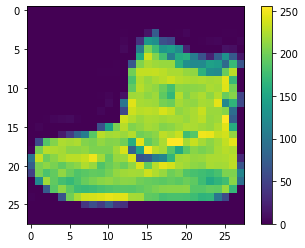

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escalaremos esses valores no intervalo de 0 e 1 antes antes de alimentar o modelo da rede neural. Para fazer isso, dividimos os valores por 255. É importante que o *conjunto de treinamento* e o *conjunto de teste* podem ser pré-processados do mesmo modo:

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que os dados estão no formato correto e que estamos prontos para construir e treinar a rede, vamos mostrar as primeiras 25 imagens do *conjunto de treinamento* e mostrar o nome das classes de cada imagem abaixo.

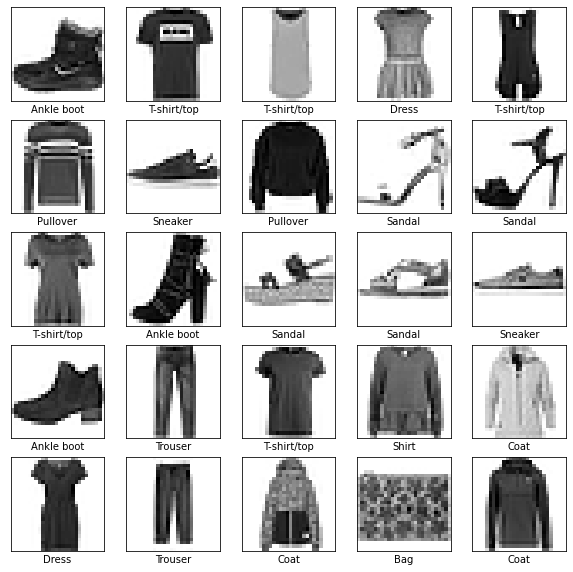

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Construindo o modelo

Construir a rede neural requer configurar as camadas do modelo, e depois, compilar o modelo.

### Montar as camadas

O principal bloco de construção da rede neural é a camada (*layer*). As camadas (*layers*) extraem representações dos dados inseridos na rede. Com sorte, essas representações são significativas para o problema à mão.

Muito do *deep learning* consiste encadear simples camadas. Muitas camadas, como `tf.keras.layers.Dense`, tem paramêtros que são aprendidos durante o treinamento.

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

A primeira camada da rede, `tf.keras.layers.Flatten`, transforma o formato da imagem de um array de imagens de duas dimensões (of 28 by 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels). Pense nessa camada como camadas não empilhadas de pixels de uma imagem e os emfilere. Essa camada não tem paramêtros para aprender; ela só reformata os dados.

Depois dos pixels serem achatados, a rede consite de uma sequência de duas camadas `tf.keras.layers.Dense`. Essa são camadas neurais *densely connected*, ou *fully connected*. A primeira camada `Dense` tem 128 nós (ou neurônios). A segunda (e última) camda é uma *softmax*  de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contem um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

### Compile o modelo

Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de *compilação*:

* *Função Loss* —Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para *guiar* o modelo para direção certa.
* *Optimizer* —Isso é como o modelo se atualiza com base no dado que ele vê e sua função *loss*.
* *Métricas* —usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a *acurácia*, a fração das imagens que foram classificadas corretamente.

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treine o modelo

Treinar a rede neural requer os seguintes passos:

1. Alimente com os dados de treinamento, o modelo. Neste exemplo, os dados de treinamento são os arrays `train_images` e `train_labels`.
2. O modelo aprende como associar as imagens as *labels*.
3. Perguntamos ao modelo para fazer previsões sobre o conjunto de teste — nesse exemplo, o array `test_images`. Verificamos se as previsões combinaram com as *labels*  do array `test_labels`.

Para começar a treinar, chame o método `model.fit`— assim chamado, porque ele "encaixa" o modelo no conjunto de treinamento:

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 0s - loss: 2.4993 - accuracy: 0.0625

  35/1875 [..............................] - ETA: 2s - loss: 1.3161 - accuracy: 0.5536

  71/1875 [>.............................] - ETA: 2s - loss: 1.0463 - accuracy: 0.6470

 108/1875 [>.............................] - ETA: 2s - loss: 0.9468 - accuracy: 0.6785

 144/1875 [=>............................] - ETA: 2s - loss: 0.8681 - accuracy: 0.7012

 180/1875 [=>............................] - ETA: 2s - loss: 0.8103 - accuracy: 0.7236

 215/1875 [==>...........................] - ETA: 2s - loss: 0.7754 - accuracy: 0.7342

 252/1875 [===>..........................] - ETA: 2s - loss: 0.7378 - accuracy: 0.7473

 288/1875 [===>..........................] - ETA: 2s - loss: 0.7186 - accuracy: 0.7534

 324/1875 [====>.........................] - ETA: 2s - loss: 0.7010 - accuracy: 0.7581

 359/1875 [====>.........................] - ETA: 2s - loss: 0.6839 - accuracy: 0.7634

 394/1875 [=====>........................] - ETA: 2s - loss: 0.6702 - accuracy: 0.7693

 430/1875 [=====>........................] - ETA: 2s - loss: 0.6574 - accuracy: 0.7727

 466/1875 [======>.......................] - ETA: 1s - loss: 0.6492 - accuracy: 0.7771

 503/1875 [=======>......................] - ETA: 1s - loss: 0.6366 - accuracy: 0.7817

 539/1875 [=======>......................] - ETA: 1s - loss: 0.6282 - accuracy: 0.7843

 576/1875 [========>.....................] - ETA: 1s - loss: 0.6198 - accuracy: 0.7872

 612/1875 [========>.....................] - ETA: 1s - loss: 0.6133 - accuracy: 0.7889

 649/1875 [=========>....................] - ETA: 1s - loss: 0.6039 - accuracy: 0.7915

 685/1875 [=========>....................] - ETA: 1s - loss: 0.6000 - accuracy: 0.7928

 721/1875 [==========>...................] - ETA: 1s - loss: 0.5952 - accuracy: 0.7945

 757/1875 [===========>..................] - ETA: 1s - loss: 0.5877 - accuracy: 0.7966

 794/1875 [===========>..................] - ETA: 1s - loss: 0.5807 - accuracy: 0.7989

 830/1875 [============>.................] - ETA: 1s - loss: 0.5773 - accuracy: 0.8000

 866/1875 [============>.................] - ETA: 1s - loss: 0.5724 - accuracy: 0.8019

 902/1875 [=============>................] - ETA: 1s - loss: 0.5655 - accuracy: 0.8040

 938/1875 [==============>...............] - ETA: 1s - loss: 0.5611 - accuracy: 0.8055

 973/1875 [==============>...............] - ETA: 1s - loss: 0.5569 - accuracy: 0.8061

1008/1875 [===============>..............] - ETA: 1s - loss: 0.5530 - accuracy: 0.8076

1044/1875 [===============>..............] - ETA: 1s - loss: 0.5488 - accuracy: 0.8086

1081/1875 [================>.............] - ETA: 1s - loss: 0.5452 - accuracy: 0.8101

1116/1875 [================>.............] - ETA: 1s - loss: 0.5416 - accuracy: 0.8108

1152/1875 [=================>............] - ETA: 1s - loss: 0.5380 - accuracy: 0.8123

1188/1875 [==================>...........] - ETA: 0s - loss: 0.5349 - accuracy: 0.8134

1224/1875 [==================>...........] - ETA: 0s - loss: 0.5319 - accuracy: 0.8144

1260/1875 [===================>..........] - ETA: 0s - loss: 0.5293 - accuracy: 0.8152

1296/1875 [===================>..........] - ETA: 0s - loss: 0.5267 - accuracy: 0.8158

1332/1875 [====================>.........] - ETA: 0s - loss: 0.5242 - accuracy: 0.8168

1368/1875 [====================>.........] - ETA: 0s - loss: 0.5219 - accuracy: 0.8173

1405/1875 [=====================>........] - ETA: 0s - loss: 0.5201 - accuracy: 0.8179

1442/1875 [======================>.......] - ETA: 0s - loss: 0.5185 - accuracy: 0.8184

1479/1875 [======================>.......] - ETA: 0s - loss: 0.5153 - accuracy: 0.8193

1516/1875 [=======================>......] - ETA: 0s - loss: 0.5137 - accuracy: 0.8199

1553/1875 [=======================>......] - ETA: 0s - loss: 0.5108 - accuracy: 0.8210

1591/1875 [========================>.....] - ETA: 0s - loss: 0.5091 - accuracy: 0.8216

1628/1875 [=========================>....] - ETA: 0s - loss: 0.5069 - accuracy: 0.8223

1665/1875 [=========================>....] - ETA: 0s - loss: 0.5048 - accuracy: 0.8232

1701/1875 [==========================>...] - ETA: 0s - loss: 0.5032 - accuracy: 0.8239

1738/1875 [==========================>...] - ETA: 0s - loss: 0.5010 - accuracy: 0.8246

1774/1875 [===========================>..] - ETA: 0s - loss: 0.4987 - accuracy: 0.8253

1812/1875 [===========================>..] - ETA: 0s - loss: 0.4975 - accuracy: 0.8258

1849/1875 [============================>.] - ETA: 0s - loss: 0.4954 - accuracy: 0.8264

1875/1875 [==============================] - 3s 1ms/step - loss: 0.4939 - accuracy: 0.8268


Epoch 2/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3359 - accuracy: 0.9375

  37/1875 [..............................] - ETA: 2s - loss: 0.4358 - accuracy: 0.8311

  74/1875 [>.............................] - ETA: 2s - loss: 0.4286 - accuracy: 0.8399

 110/1875 [>.............................] - ETA: 2s - loss: 0.4299 - accuracy: 0.8449

 147/1875 [=>............................] - ETA: 2s - loss: 0.4156 - accuracy: 0.8489

 183/1875 [=>............................] - ETA: 2s - loss: 0.4123 - accuracy: 0.8513

 219/1875 [==>...........................] - ETA: 2s - loss: 0.4056 - accuracy: 0.8549

 255/1875 [===>..........................] - ETA: 2s - loss: 0.4051 - accuracy: 0.8553

 292/1875 [===>..........................] - ETA: 2s - loss: 0.4052 - accuracy: 0.8566

 328/1875 [====>.........................] - ETA: 2s - loss: 0.4006 - accuracy: 0.8590

 365/1875 [====>.........................] - ETA: 2s - loss: 0.3947 - accuracy: 0.8610

 402/1875 [=====>........................] - ETA: 2s - loss: 0.3929 - accuracy: 0.8623

 438/1875 [======>.......................] - ETA: 1s - loss: 0.3931 - accuracy: 0.8633

 475/1875 [======>.......................] - ETA: 1s - loss: 0.3925 - accuracy: 0.8621

 511/1875 [=======>......................] - ETA: 1s - loss: 0.3927 - accuracy: 0.8615

 547/1875 [=======>......................] - ETA: 1s - loss: 0.3907 - accuracy: 0.8619

 584/1875 [========>.....................] - ETA: 1s - loss: 0.3887 - accuracy: 0.8626

 620/1875 [========>.....................] - ETA: 1s - loss: 0.3891 - accuracy: 0.8617

 657/1875 [=========>....................] - ETA: 1s - loss: 0.3903 - accuracy: 0.8611

 694/1875 [==========>...................] - ETA: 1s - loss: 0.3913 - accuracy: 0.8603

 732/1875 [==========>...................] - ETA: 1s - loss: 0.3883 - accuracy: 0.8613

 769/1875 [===========>..................] - ETA: 1s - loss: 0.3870 - accuracy: 0.8616

 807/1875 [===========>..................] - ETA: 1s - loss: 0.3873 - accuracy: 0.8610

 843/1875 [============>.................] - ETA: 1s - loss: 0.3869 - accuracy: 0.8610

 880/1875 [=============>................] - ETA: 1s - loss: 0.3856 - accuracy: 0.8615

 917/1875 [=============>................] - ETA: 1s - loss: 0.3827 - accuracy: 0.8628

 955/1875 [==============>...............] - ETA: 1s - loss: 0.3832 - accuracy: 0.8626

 992/1875 [==============>...............] - ETA: 1s - loss: 0.3850 - accuracy: 0.8622

1029/1875 [===============>..............] - ETA: 1s - loss: 0.3841 - accuracy: 0.8622

1067/1875 [================>.............] - ETA: 1s - loss: 0.3841 - accuracy: 0.8622

1104/1875 [================>.............] - ETA: 1s - loss: 0.3842 - accuracy: 0.8621

1141/1875 [=================>............] - ETA: 1s - loss: 0.3840 - accuracy: 0.8623

1178/1875 [=================>............] - ETA: 0s - loss: 0.3837 - accuracy: 0.8626

1216/1875 [==================>...........] - ETA: 0s - loss: 0.3831 - accuracy: 0.8627

1254/1875 [===================>..........] - ETA: 0s - loss: 0.3825 - accuracy: 0.8627

1292/1875 [===================>..........] - ETA: 0s - loss: 0.3811 - accuracy: 0.8630

1329/1875 [====================>.........] - ETA: 0s - loss: 0.3821 - accuracy: 0.8625

1366/1875 [====================>.........] - ETA: 0s - loss: 0.3819 - accuracy: 0.8625

1403/1875 [=====================>........] - ETA: 0s - loss: 0.3808 - accuracy: 0.8630

1440/1875 [======================>.......] - ETA: 0s - loss: 0.3806 - accuracy: 0.8632

1476/1875 [======================>.......] - ETA: 0s - loss: 0.3798 - accuracy: 0.8636

1513/1875 [=======================>......] - ETA: 0s - loss: 0.3804 - accuracy: 0.8633

1551/1875 [=======================>......] - ETA: 0s - loss: 0.3794 - accuracy: 0.8638

1588/1875 [========================>.....] - ETA: 0s - loss: 0.3790 - accuracy: 0.8640

1625/1875 [=========================>....] - ETA: 0s - loss: 0.3780 - accuracy: 0.8643

1660/1875 [=========================>....] - ETA: 0s - loss: 0.3782 - accuracy: 0.8641

1696/1875 [==========================>...] - ETA: 0s - loss: 0.3782 - accuracy: 0.8643

1733/1875 [==========================>...] - ETA: 0s - loss: 0.3778 - accuracy: 0.8644

1771/1875 [===========================>..] - ETA: 0s - loss: 0.3778 - accuracy: 0.8643

1808/1875 [===========================>..] - ETA: 0s - loss: 0.3770 - accuracy: 0.8646

1847/1875 [============================>.] - ETA: 0s - loss: 0.3763 - accuracy: 0.8647

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3759 - accuracy: 0.8648


Epoch 3/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3533 - accuracy: 0.9062

  39/1875 [..............................] - ETA: 2s - loss: 0.3441 - accuracy: 0.8750

  76/1875 [>.............................] - ETA: 2s - loss: 0.3395 - accuracy: 0.8766

 113/1875 [>.............................] - ETA: 2s - loss: 0.3300 - accuracy: 0.8805

 150/1875 [=>............................] - ETA: 2s - loss: 0.3398 - accuracy: 0.8777

 187/1875 [=>............................] - ETA: 2s - loss: 0.3400 - accuracy: 0.8772

 224/1875 [==>...........................] - ETA: 2s - loss: 0.3381 - accuracy: 0.8785

 261/1875 [===>..........................] - ETA: 2s - loss: 0.3384 - accuracy: 0.8784

 298/1875 [===>..........................] - ETA: 2s - loss: 0.3379 - accuracy: 0.8789

 336/1875 [====>.........................] - ETA: 2s - loss: 0.3394 - accuracy: 0.8790

 373/1875 [====>.........................] - ETA: 2s - loss: 0.3387 - accuracy: 0.8772

 411/1875 [=====>........................] - ETA: 1s - loss: 0.3396 - accuracy: 0.8771

 447/1875 [======>.......................] - ETA: 1s - loss: 0.3386 - accuracy: 0.8774

 484/1875 [======>.......................] - ETA: 1s - loss: 0.3402 - accuracy: 0.8779

 521/1875 [=======>......................] - ETA: 1s - loss: 0.3406 - accuracy: 0.8775

 559/1875 [=======>......................] - ETA: 1s - loss: 0.3388 - accuracy: 0.8779

 597/1875 [========>.....................] - ETA: 1s - loss: 0.3398 - accuracy: 0.8774

 635/1875 [=========>....................] - ETA: 1s - loss: 0.3391 - accuracy: 0.8768

 673/1875 [=========>....................] - ETA: 1s - loss: 0.3368 - accuracy: 0.8777

 711/1875 [==========>...................] - ETA: 1s - loss: 0.3355 - accuracy: 0.8783

 748/1875 [==========>...................] - ETA: 1s - loss: 0.3366 - accuracy: 0.8783

 785/1875 [===========>..................] - ETA: 1s - loss: 0.3357 - accuracy: 0.8785

 822/1875 [============>.................] - ETA: 1s - loss: 0.3351 - accuracy: 0.8783

 859/1875 [============>.................] - ETA: 1s - loss: 0.3342 - accuracy: 0.8785

 895/1875 [=============>................] - ETA: 1s - loss: 0.3343 - accuracy: 0.8787

 931/1875 [=============>................] - ETA: 1s - loss: 0.3343 - accuracy: 0.8789

 969/1875 [==============>...............] - ETA: 1s - loss: 0.3330 - accuracy: 0.8793

1006/1875 [===============>..............] - ETA: 1s - loss: 0.3327 - accuracy: 0.8793

1043/1875 [===============>..............] - ETA: 1s - loss: 0.3337 - accuracy: 0.8790

1081/1875 [================>.............] - ETA: 1s - loss: 0.3347 - accuracy: 0.8786

1118/1875 [================>.............] - ETA: 1s - loss: 0.3344 - accuracy: 0.8787

1155/1875 [=================>............] - ETA: 0s - loss: 0.3349 - accuracy: 0.8784

1192/1875 [==================>...........] - ETA: 0s - loss: 0.3339 - accuracy: 0.8787

1229/1875 [==================>...........] - ETA: 0s - loss: 0.3339 - accuracy: 0.8790

1267/1875 [===================>..........] - ETA: 0s - loss: 0.3333 - accuracy: 0.8794

1304/1875 [===================>..........] - ETA: 0s - loss: 0.3337 - accuracy: 0.8792

1341/1875 [====================>.........] - ETA: 0s - loss: 0.3324 - accuracy: 0.8794

1379/1875 [=====================>........] - ETA: 0s - loss: 0.3323 - accuracy: 0.8794

1417/1875 [=====================>........] - ETA: 0s - loss: 0.3330 - accuracy: 0.8792

1455/1875 [======================>.......] - ETA: 0s - loss: 0.3339 - accuracy: 0.8794

1494/1875 [======================>.......] - ETA: 0s - loss: 0.3343 - accuracy: 0.8796

1532/1875 [=======================>......] - ETA: 0s - loss: 0.3352 - accuracy: 0.8791

1570/1875 [========================>.....] - ETA: 0s - loss: 0.3351 - accuracy: 0.8794

1608/1875 [========================>.....] - ETA: 0s - loss: 0.3357 - accuracy: 0.8791

1645/1875 [=========================>....] - ETA: 0s - loss: 0.3355 - accuracy: 0.8791

1682/1875 [=========================>....] - ETA: 0s - loss: 0.3353 - accuracy: 0.8793

1719/1875 [==========================>...] - ETA: 0s - loss: 0.3357 - accuracy: 0.8791

1755/1875 [===========================>..] - ETA: 0s - loss: 0.3359 - accuracy: 0.8789

1793/1875 [===========================>..] - ETA: 0s - loss: 0.3359 - accuracy: 0.8788

1830/1875 [============================>.] - ETA: 0s - loss: 0.3359 - accuracy: 0.8788

1867/1875 [============================>.] - ETA: 0s - loss: 0.3356 - accuracy: 0.8788

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3354 - accuracy: 0.8789


Epoch 4/10
   1/1875 [..............................] - ETA: 0s - loss: 0.1942 - accuracy: 0.9375

  37/1875 [..............................] - ETA: 2s - loss: 0.3020 - accuracy: 0.8834

  74/1875 [>.............................] - ETA: 2s - loss: 0.3017 - accuracy: 0.8894

 111/1875 [>.............................] - ETA: 2s - loss: 0.3006 - accuracy: 0.8896

 147/1875 [=>............................] - ETA: 2s - loss: 0.3009 - accuracy: 0.8848

 183/1875 [=>............................] - ETA: 2s - loss: 0.3080 - accuracy: 0.8832

 220/1875 [==>...........................] - ETA: 2s - loss: 0.3054 - accuracy: 0.8847

 256/1875 [===>..........................] - ETA: 2s - loss: 0.3021 - accuracy: 0.8883

 293/1875 [===>..........................] - ETA: 2s - loss: 0.3003 - accuracy: 0.8879

 330/1875 [====>.........................] - ETA: 2s - loss: 0.3008 - accuracy: 0.8882

 367/1875 [====>.........................] - ETA: 2s - loss: 0.3036 - accuracy: 0.8877

 404/1875 [=====>........................] - ETA: 2s - loss: 0.3073 - accuracy: 0.8869

 441/1875 [======>.......................] - ETA: 1s - loss: 0.3096 - accuracy: 0.8865

 477/1875 [======>.......................] - ETA: 1s - loss: 0.3107 - accuracy: 0.8862

 514/1875 [=======>......................] - ETA: 1s - loss: 0.3094 - accuracy: 0.8864

 550/1875 [=======>......................] - ETA: 1s - loss: 0.3109 - accuracy: 0.8857

 586/1875 [========>.....................] - ETA: 1s - loss: 0.3106 - accuracy: 0.8855

 623/1875 [========>.....................] - ETA: 1s - loss: 0.3095 - accuracy: 0.8858

 660/1875 [=========>....................] - ETA: 1s - loss: 0.3090 - accuracy: 0.8858

 697/1875 [==========>...................] - ETA: 1s - loss: 0.3099 - accuracy: 0.8857

 734/1875 [==========>...................] - ETA: 1s - loss: 0.3105 - accuracy: 0.8855

 771/1875 [===========>..................] - ETA: 1s - loss: 0.3132 - accuracy: 0.8848

 808/1875 [===========>..................] - ETA: 1s - loss: 0.3136 - accuracy: 0.8847

 844/1875 [============>.................] - ETA: 1s - loss: 0.3142 - accuracy: 0.8843

 881/1875 [=============>................] - ETA: 1s - loss: 0.3142 - accuracy: 0.8844

 918/1875 [=============>................] - ETA: 1s - loss: 0.3148 - accuracy: 0.8840

 954/1875 [==============>...............] - ETA: 1s - loss: 0.3155 - accuracy: 0.8844

 991/1875 [==============>...............] - ETA: 1s - loss: 0.3144 - accuracy: 0.8853

1028/1875 [===============>..............] - ETA: 1s - loss: 0.3133 - accuracy: 0.8855

1064/1875 [================>.............] - ETA: 1s - loss: 0.3143 - accuracy: 0.8852

1101/1875 [================>.............] - ETA: 1s - loss: 0.3142 - accuracy: 0.8855

1138/1875 [=================>............] - ETA: 1s - loss: 0.3138 - accuracy: 0.8856

1174/1875 [=================>............] - ETA: 0s - loss: 0.3139 - accuracy: 0.8857

1210/1875 [==================>...........] - ETA: 0s - loss: 0.3141 - accuracy: 0.8858

1246/1875 [==================>...........] - ETA: 0s - loss: 0.3158 - accuracy: 0.8849

1283/1875 [===================>..........] - ETA: 0s - loss: 0.3154 - accuracy: 0.8854

1318/1875 [====================>.........] - ETA: 0s - loss: 0.3151 - accuracy: 0.8856

1354/1875 [====================>.........] - ETA: 0s - loss: 0.3153 - accuracy: 0.8855

1390/1875 [=====================>........] - ETA: 0s - loss: 0.3163 - accuracy: 0.8851

1427/1875 [=====================>........] - ETA: 0s - loss: 0.3165 - accuracy: 0.8849

1463/1875 [======================>.......] - ETA: 0s - loss: 0.3168 - accuracy: 0.8846

1499/1875 [======================>.......] - ETA: 0s - loss: 0.3168 - accuracy: 0.8846

1536/1875 [=======================>......] - ETA: 0s - loss: 0.3164 - accuracy: 0.8846

1573/1875 [========================>.....] - ETA: 0s - loss: 0.3159 - accuracy: 0.8849

1609/1875 [========================>.....] - ETA: 0s - loss: 0.3162 - accuracy: 0.8849

1645/1875 [=========================>....] - ETA: 0s - loss: 0.3157 - accuracy: 0.8851

1681/1875 [=========================>....] - ETA: 0s - loss: 0.3155 - accuracy: 0.8853

1718/1875 [==========================>...] - ETA: 0s - loss: 0.3154 - accuracy: 0.8852

1756/1875 [===========================>..] - ETA: 0s - loss: 0.3146 - accuracy: 0.8854

1794/1875 [===========================>..] - ETA: 0s - loss: 0.3145 - accuracy: 0.8854

1832/1875 [============================>.] - ETA: 0s - loss: 0.3148 - accuracy: 0.8852

1869/1875 [============================>.] - ETA: 0s - loss: 0.3148 - accuracy: 0.8851

1875/1875 [==============================] - 3s 1ms/step - loss: 0.3146 - accuracy: 0.8851


Epoch 5/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3411 - accuracy: 0.8750

  37/1875 [..............................] - ETA: 2s - loss: 0.2756 - accuracy: 0.8961

  74/1875 [>.............................] - ETA: 2s - loss: 0.2981 - accuracy: 0.8872

 110/1875 [>.............................] - ETA: 2s - loss: 0.3020 - accuracy: 0.8849

 147/1875 [=>............................] - ETA: 2s - loss: 0.3009 - accuracy: 0.8871

 183/1875 [=>............................] - ETA: 2s - loss: 0.3018 - accuracy: 0.8870

 220/1875 [==>...........................] - ETA: 2s - loss: 0.2957 - accuracy: 0.8903

 258/1875 [===>..........................] - ETA: 2s - loss: 0.2943 - accuracy: 0.8897

 296/1875 [===>..........................] - ETA: 2s - loss: 0.2919 - accuracy: 0.8902

 332/1875 [====>.........................] - ETA: 2s - loss: 0.2937 - accuracy: 0.8896

 369/1875 [====>.........................] - ETA: 2s - loss: 0.2920 - accuracy: 0.8900

 406/1875 [=====>........................] - ETA: 2s - loss: 0.2951 - accuracy: 0.8892

 443/1875 [======>.......................] - ETA: 1s - loss: 0.2959 - accuracy: 0.8890

 480/1875 [======>.......................] - ETA: 1s - loss: 0.2938 - accuracy: 0.8903

 516/1875 [=======>......................] - ETA: 1s - loss: 0.2932 - accuracy: 0.8907

 553/1875 [=======>......................] - ETA: 1s - loss: 0.2929 - accuracy: 0.8897

 591/1875 [========>.....................] - ETA: 1s - loss: 0.2921 - accuracy: 0.8907

 628/1875 [=========>....................] - ETA: 1s - loss: 0.2919 - accuracy: 0.8911

 665/1875 [=========>....................] - ETA: 1s - loss: 0.2919 - accuracy: 0.8914

 702/1875 [==========>...................] - ETA: 1s - loss: 0.2933 - accuracy: 0.8912

 741/1875 [==========>...................] - ETA: 1s - loss: 0.2928 - accuracy: 0.8912

 778/1875 [===========>..................] - ETA: 1s - loss: 0.2923 - accuracy: 0.8911

 815/1875 [============>.................] - ETA: 1s - loss: 0.2938 - accuracy: 0.8905

 852/1875 [============>.................] - ETA: 1s - loss: 0.2957 - accuracy: 0.8898

 889/1875 [=============>................] - ETA: 1s - loss: 0.2953 - accuracy: 0.8899

 926/1875 [=============>................] - ETA: 1s - loss: 0.2948 - accuracy: 0.8902

 964/1875 [==============>...............] - ETA: 1s - loss: 0.2953 - accuracy: 0.8905

1001/1875 [===============>..............] - ETA: 1s - loss: 0.2951 - accuracy: 0.8908

1037/1875 [===============>..............] - ETA: 1s - loss: 0.2950 - accuracy: 0.8908

1074/1875 [================>.............] - ETA: 1s - loss: 0.2939 - accuracy: 0.8912

1111/1875 [================>.............] - ETA: 1s - loss: 0.2930 - accuracy: 0.8913

1148/1875 [=================>............] - ETA: 0s - loss: 0.2924 - accuracy: 0.8914

1185/1875 [=================>............] - ETA: 0s - loss: 0.2932 - accuracy: 0.8912

1223/1875 [==================>...........] - ETA: 0s - loss: 0.2944 - accuracy: 0.8911

1260/1875 [===================>..........] - ETA: 0s - loss: 0.2943 - accuracy: 0.8911

1297/1875 [===================>..........] - ETA: 0s - loss: 0.2946 - accuracy: 0.8912

1335/1875 [====================>.........] - ETA: 0s - loss: 0.2951 - accuracy: 0.8908

1371/1875 [====================>.........] - ETA: 0s - loss: 0.2953 - accuracy: 0.8908

1405/1875 [=====================>........] - ETA: 0s - loss: 0.2959 - accuracy: 0.8907

1439/1875 [======================>.......] - ETA: 0s - loss: 0.2962 - accuracy: 0.8909

1473/1875 [======================>.......] - ETA: 0s - loss: 0.2966 - accuracy: 0.8908

1507/1875 [=======================>......] - ETA: 0s - loss: 0.2965 - accuracy: 0.8908

1541/1875 [=======================>......] - ETA: 0s - loss: 0.2961 - accuracy: 0.8909

1576/1875 [========================>.....] - ETA: 0s - loss: 0.2965 - accuracy: 0.8907

1610/1875 [========================>.....] - ETA: 0s - loss: 0.2964 - accuracy: 0.8908

1645/1875 [=========================>....] - ETA: 0s - loss: 0.2966 - accuracy: 0.8908

1679/1875 [=========================>....] - ETA: 0s - loss: 0.2965 - accuracy: 0.8909

1716/1875 [==========================>...] - ETA: 0s - loss: 0.2962 - accuracy: 0.8909

1752/1875 [===========================>..] - ETA: 0s - loss: 0.2964 - accuracy: 0.8909

1789/1875 [===========================>..] - ETA: 0s - loss: 0.2964 - accuracy: 0.8909

1826/1875 [============================>.] - ETA: 0s - loss: 0.2964 - accuracy: 0.8911

1863/1875 [============================>.] - ETA: 0s - loss: 0.2962 - accuracy: 0.8912

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2959 - accuracy: 0.8913


Epoch 6/10
   1/1875 [..............................] - ETA: 0s - loss: 0.4049 - accuracy: 0.8438

  39/1875 [..............................] - ETA: 2s - loss: 0.2927 - accuracy: 0.8910

  76/1875 [>.............................] - ETA: 2s - loss: 0.2832 - accuracy: 0.8947

 114/1875 [>.............................] - ETA: 2s - loss: 0.2765 - accuracy: 0.8967

 152/1875 [=>............................] - ETA: 2s - loss: 0.2758 - accuracy: 0.8988

 190/1875 [==>...........................] - ETA: 2s - loss: 0.2781 - accuracy: 0.8988

 229/1875 [==>...........................] - ETA: 2s - loss: 0.2790 - accuracy: 0.8978

 267/1875 [===>..........................] - ETA: 2s - loss: 0.2771 - accuracy: 0.8984

 305/1875 [===>..........................] - ETA: 2s - loss: 0.2791 - accuracy: 0.8957

 342/1875 [====>.........................] - ETA: 2s - loss: 0.2789 - accuracy: 0.8967

 379/1875 [=====>........................] - ETA: 2s - loss: 0.2771 - accuracy: 0.8977

 416/1875 [=====>........................] - ETA: 1s - loss: 0.2776 - accuracy: 0.8975

 453/1875 [======>.......................] - ETA: 1s - loss: 0.2774 - accuracy: 0.8977

 490/1875 [======>.......................] - ETA: 1s - loss: 0.2765 - accuracy: 0.8974

 528/1875 [=======>......................] - ETA: 1s - loss: 0.2781 - accuracy: 0.8966

 565/1875 [========>.....................] - ETA: 1s - loss: 0.2809 - accuracy: 0.8959

 602/1875 [========>.....................] - ETA: 1s - loss: 0.2802 - accuracy: 0.8964

 640/1875 [=========>....................] - ETA: 1s - loss: 0.2797 - accuracy: 0.8967

 678/1875 [=========>....................] - ETA: 1s - loss: 0.2809 - accuracy: 0.8962

 714/1875 [==========>...................] - ETA: 1s - loss: 0.2801 - accuracy: 0.8970

 748/1875 [==========>...................] - ETA: 1s - loss: 0.2798 - accuracy: 0.8973

 785/1875 [===========>..................] - ETA: 1s - loss: 0.2809 - accuracy: 0.8970

 822/1875 [============>.................] - ETA: 1s - loss: 0.2802 - accuracy: 0.8971

 860/1875 [============>.................] - ETA: 1s - loss: 0.2794 - accuracy: 0.8973

 898/1875 [=============>................] - ETA: 1s - loss: 0.2792 - accuracy: 0.8970

 937/1875 [=============>................] - ETA: 1s - loss: 0.2803 - accuracy: 0.8966

 975/1875 [==============>...............] - ETA: 1s - loss: 0.2796 - accuracy: 0.8971

1013/1875 [===============>..............] - ETA: 1s - loss: 0.2807 - accuracy: 0.8965

1050/1875 [===============>..............] - ETA: 1s - loss: 0.2815 - accuracy: 0.8963

1088/1875 [================>.............] - ETA: 1s - loss: 0.2807 - accuracy: 0.8964

1125/1875 [=================>............] - ETA: 1s - loss: 0.2815 - accuracy: 0.8960

1162/1875 [=================>............] - ETA: 0s - loss: 0.2816 - accuracy: 0.8959

1198/1875 [==================>...........] - ETA: 0s - loss: 0.2817 - accuracy: 0.8959

1236/1875 [==================>...........] - ETA: 0s - loss: 0.2826 - accuracy: 0.8953

1274/1875 [===================>..........] - ETA: 0s - loss: 0.2823 - accuracy: 0.8954

1312/1875 [===================>..........] - ETA: 0s - loss: 0.2818 - accuracy: 0.8957

1350/1875 [====================>.........] - ETA: 0s - loss: 0.2810 - accuracy: 0.8962

1388/1875 [=====================>........] - ETA: 0s - loss: 0.2810 - accuracy: 0.8962

1426/1875 [=====================>........] - ETA: 0s - loss: 0.2804 - accuracy: 0.8965

1463/1875 [======================>.......] - ETA: 0s - loss: 0.2800 - accuracy: 0.8965

1501/1875 [=======================>......] - ETA: 0s - loss: 0.2800 - accuracy: 0.8964

1539/1875 [=======================>......] - ETA: 0s - loss: 0.2803 - accuracy: 0.8963

1577/1875 [========================>.....] - ETA: 0s - loss: 0.2808 - accuracy: 0.8960

1615/1875 [========================>.....] - ETA: 0s - loss: 0.2809 - accuracy: 0.8960

1653/1875 [=========================>....] - ETA: 0s - loss: 0.2813 - accuracy: 0.8957

1691/1875 [==========================>...] - ETA: 0s - loss: 0.2812 - accuracy: 0.8957

1729/1875 [==========================>...] - ETA: 0s - loss: 0.2809 - accuracy: 0.8958

1766/1875 [===========================>..] - ETA: 0s - loss: 0.2812 - accuracy: 0.8958

1803/1875 [===========================>..] - ETA: 0s - loss: 0.2816 - accuracy: 0.8956

1840/1875 [============================>.] - ETA: 0s - loss: 0.2815 - accuracy: 0.8957

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2809 - accuracy: 0.8959


Epoch 7/10


   1/1875 [..............................] - ETA: 0s - loss: 0.2103 - accuracy: 0.8750

  38/1875 [..............................] - ETA: 2s - loss: 0.3025 - accuracy: 0.8923

  76/1875 [>.............................] - ETA: 2s - loss: 0.2824 - accuracy: 0.9013

 114/1875 [>.............................] - ETA: 2s - loss: 0.2745 - accuracy: 0.9043

 152/1875 [=>............................] - ETA: 2s - loss: 0.2795 - accuracy: 0.9013

 190/1875 [==>...........................] - ETA: 2s - loss: 0.2790 - accuracy: 0.9007

 227/1875 [==>...........................] - ETA: 2s - loss: 0.2787 - accuracy: 0.8999

 264/1875 [===>..........................] - ETA: 2s - loss: 0.2764 - accuracy: 0.9010

 302/1875 [===>..........................] - ETA: 2s - loss: 0.2737 - accuracy: 0.9015

 340/1875 [====>.........................] - ETA: 2s - loss: 0.2672 - accuracy: 0.9034

 378/1875 [=====>........................] - ETA: 2s - loss: 0.2663 - accuracy: 0.9036

 415/1875 [=====>........................] - ETA: 1s - loss: 0.2658 - accuracy: 0.9029

 453/1875 [======>.......................] - ETA: 1s - loss: 0.2659 - accuracy: 0.9026

 491/1875 [======>.......................] - ETA: 1s - loss: 0.2672 - accuracy: 0.9022

 527/1875 [=======>......................] - ETA: 1s - loss: 0.2659 - accuracy: 0.9029

 564/1875 [========>.....................] - ETA: 1s - loss: 0.2664 - accuracy: 0.9029

 601/1875 [========>.....................] - ETA: 1s - loss: 0.2656 - accuracy: 0.9030

 639/1875 [=========>....................] - ETA: 1s - loss: 0.2665 - accuracy: 0.9024

 676/1875 [=========>....................] - ETA: 1s - loss: 0.2647 - accuracy: 0.9027

 714/1875 [==========>...................] - ETA: 1s - loss: 0.2649 - accuracy: 0.9025

 752/1875 [===========>..................] - ETA: 1s - loss: 0.2648 - accuracy: 0.9023

 787/1875 [===========>..................] - ETA: 1s - loss: 0.2675 - accuracy: 0.9014

 821/1875 [============>.................] - ETA: 1s - loss: 0.2671 - accuracy: 0.9018

 856/1875 [============>.................] - ETA: 1s - loss: 0.2671 - accuracy: 0.9019

 892/1875 [=============>................] - ETA: 1s - loss: 0.2659 - accuracy: 0.9023

 928/1875 [=============>................] - ETA: 1s - loss: 0.2663 - accuracy: 0.9021

 964/1875 [==============>...............] - ETA: 1s - loss: 0.2656 - accuracy: 0.9023

1001/1875 [===============>..............] - ETA: 1s - loss: 0.2674 - accuracy: 0.9021

1038/1875 [===============>..............] - ETA: 1s - loss: 0.2668 - accuracy: 0.9018

1075/1875 [================>.............] - ETA: 1s - loss: 0.2662 - accuracy: 0.9023

1113/1875 [================>.............] - ETA: 1s - loss: 0.2659 - accuracy: 0.9023

1150/1875 [=================>............] - ETA: 0s - loss: 0.2644 - accuracy: 0.9029

1187/1875 [=================>............] - ETA: 0s - loss: 0.2650 - accuracy: 0.9029

1224/1875 [==================>...........] - ETA: 0s - loss: 0.2660 - accuracy: 0.9028

1261/1875 [===================>..........] - ETA: 0s - loss: 0.2675 - accuracy: 0.9021

1299/1875 [===================>..........] - ETA: 0s - loss: 0.2675 - accuracy: 0.9024

1337/1875 [====================>.........] - ETA: 0s - loss: 0.2672 - accuracy: 0.9027

1375/1875 [=====================>........] - ETA: 0s - loss: 0.2678 - accuracy: 0.9024

1412/1875 [=====================>........] - ETA: 0s - loss: 0.2673 - accuracy: 0.9025

1449/1875 [======================>.......] - ETA: 0s - loss: 0.2672 - accuracy: 0.9026

1486/1875 [======================>.......] - ETA: 0s - loss: 0.2684 - accuracy: 0.9020

1522/1875 [=======================>......] - ETA: 0s - loss: 0.2686 - accuracy: 0.9018

1558/1875 [=======================>......] - ETA: 0s - loss: 0.2691 - accuracy: 0.9016

1594/1875 [========================>.....] - ETA: 0s - loss: 0.2687 - accuracy: 0.9015

1631/1875 [=========================>....] - ETA: 0s - loss: 0.2689 - accuracy: 0.9012

1668/1875 [=========================>....] - ETA: 0s - loss: 0.2688 - accuracy: 0.9013

1704/1875 [==========================>...] - ETA: 0s - loss: 0.2687 - accuracy: 0.9012

1738/1875 [==========================>...] - ETA: 0s - loss: 0.2681 - accuracy: 0.9014

1771/1875 [===========================>..] - ETA: 0s - loss: 0.2686 - accuracy: 0.9012

1805/1875 [===========================>..] - ETA: 0s - loss: 0.2683 - accuracy: 0.9012

1840/1875 [============================>.] - ETA: 0s - loss: 0.2689 - accuracy: 0.9009

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2693 - accuracy: 0.9008


Epoch 8/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3097 - accuracy: 0.8750

  39/1875 [..............................] - ETA: 2s - loss: 0.2567 - accuracy: 0.9022

  75/1875 [>.............................] - ETA: 2s - loss: 0.2537 - accuracy: 0.9008

 113/1875 [>.............................] - ETA: 2s - loss: 0.2649 - accuracy: 0.8999

 151/1875 [=>............................] - ETA: 2s - loss: 0.2605 - accuracy: 0.9007

 189/1875 [==>...........................] - ETA: 2s - loss: 0.2663 - accuracy: 0.8998

 226/1875 [==>...........................] - ETA: 2s - loss: 0.2631 - accuracy: 0.9018

 263/1875 [===>..........................] - ETA: 2s - loss: 0.2599 - accuracy: 0.9035

 301/1875 [===>..........................] - ETA: 2s - loss: 0.2617 - accuracy: 0.9021

 339/1875 [====>.........................] - ETA: 2s - loss: 0.2612 - accuracy: 0.9026

 376/1875 [=====>........................] - ETA: 2s - loss: 0.2614 - accuracy: 0.9025

 414/1875 [=====>........................] - ETA: 1s - loss: 0.2610 - accuracy: 0.9032

 452/1875 [======>.......................] - ETA: 1s - loss: 0.2624 - accuracy: 0.9026

 487/1875 [======>.......................] - ETA: 1s - loss: 0.2590 - accuracy: 0.9043

 520/1875 [=======>......................] - ETA: 1s - loss: 0.2580 - accuracy: 0.9048

 553/1875 [=======>......................] - ETA: 1s - loss: 0.2593 - accuracy: 0.9043

 587/1875 [========>.....................] - ETA: 1s - loss: 0.2579 - accuracy: 0.9051

 621/1875 [========>.....................] - ETA: 1s - loss: 0.2601 - accuracy: 0.9049

 656/1875 [=========>....................] - ETA: 1s - loss: 0.2599 - accuracy: 0.9049

 691/1875 [==========>...................] - ETA: 1s - loss: 0.2591 - accuracy: 0.9052

 725/1875 [==========>...................] - ETA: 1s - loss: 0.2591 - accuracy: 0.9053

 759/1875 [===========>..................] - ETA: 1s - loss: 0.2585 - accuracy: 0.9053

 794/1875 [===========>..................] - ETA: 1s - loss: 0.2575 - accuracy: 0.9057

 829/1875 [============>.................] - ETA: 1s - loss: 0.2584 - accuracy: 0.9052

 864/1875 [============>.................] - ETA: 1s - loss: 0.2597 - accuracy: 0.9049

 898/1875 [=============>................] - ETA: 1s - loss: 0.2597 - accuracy: 0.9046

 931/1875 [=============>................] - ETA: 1s - loss: 0.2591 - accuracy: 0.9049

 964/1875 [==============>...............] - ETA: 1s - loss: 0.2600 - accuracy: 0.9043

 998/1875 [==============>...............] - ETA: 1s - loss: 0.2590 - accuracy: 0.9048

1033/1875 [===============>..............] - ETA: 1s - loss: 0.2579 - accuracy: 0.9050

1067/1875 [================>.............] - ETA: 1s - loss: 0.2581 - accuracy: 0.9051

1102/1875 [================>.............] - ETA: 1s - loss: 0.2584 - accuracy: 0.9048

1136/1875 [=================>............] - ETA: 1s - loss: 0.2584 - accuracy: 0.9050

1170/1875 [=================>............] - ETA: 1s - loss: 0.2582 - accuracy: 0.9050

1205/1875 [==================>...........] - ETA: 0s - loss: 0.2592 - accuracy: 0.9045

1239/1875 [==================>...........] - ETA: 0s - loss: 0.2599 - accuracy: 0.9045

1273/1875 [===================>..........] - ETA: 0s - loss: 0.2594 - accuracy: 0.9047

1307/1875 [===================>..........] - ETA: 0s - loss: 0.2593 - accuracy: 0.9046

1341/1875 [====================>.........] - ETA: 0s - loss: 0.2583 - accuracy: 0.9048

1375/1875 [=====================>........] - ETA: 0s - loss: 0.2590 - accuracy: 0.9047

1409/1875 [=====================>........] - ETA: 0s - loss: 0.2583 - accuracy: 0.9049

1444/1875 [======================>.......] - ETA: 0s - loss: 0.2584 - accuracy: 0.9046

1479/1875 [======================>.......] - ETA: 0s - loss: 0.2583 - accuracy: 0.9050

1512/1875 [=======================>......] - ETA: 0s - loss: 0.2585 - accuracy: 0.9050

1545/1875 [=======================>......] - ETA: 0s - loss: 0.2585 - accuracy: 0.9049

1579/1875 [========================>.....] - ETA: 0s - loss: 0.2585 - accuracy: 0.9048

1612/1875 [========================>.....] - ETA: 0s - loss: 0.2584 - accuracy: 0.9048

1646/1875 [=========================>....] - ETA: 0s - loss: 0.2584 - accuracy: 0.9047

1680/1875 [=========================>....] - ETA: 0s - loss: 0.2583 - accuracy: 0.9049

1714/1875 [==========================>...] - ETA: 0s - loss: 0.2579 - accuracy: 0.9050

1748/1875 [==========================>...] - ETA: 0s - loss: 0.2579 - accuracy: 0.9049

1782/1875 [===========================>..] - ETA: 0s - loss: 0.2582 - accuracy: 0.9048

1816/1875 [============================>.] - ETA: 0s - loss: 0.2582 - accuracy: 0.9048

1850/1875 [============================>.] - ETA: 0s - loss: 0.2580 - accuracy: 0.9049

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2587 - accuracy: 0.9048


Epoch 9/10
   1/1875 [..............................] - ETA: 0s - loss: 0.3438 - accuracy: 0.8750

  33/1875 [..............................] - ETA: 2s - loss: 0.2536 - accuracy: 0.9034

  65/1875 [>.............................] - ETA: 2s - loss: 0.2509 - accuracy: 0.9082

  98/1875 [>.............................] - ETA: 2s - loss: 0.2342 - accuracy: 0.9123

 132/1875 [=>............................] - ETA: 2s - loss: 0.2309 - accuracy: 0.9141

 166/1875 [=>............................] - ETA: 2s - loss: 0.2420 - accuracy: 0.9106

 201/1875 [==>...........................] - ETA: 2s - loss: 0.2360 - accuracy: 0.9118

 234/1875 [==>...........................] - ETA: 2s - loss: 0.2349 - accuracy: 0.9117

 268/1875 [===>..........................] - ETA: 2s - loss: 0.2338 - accuracy: 0.9128

 301/1875 [===>..........................] - ETA: 2s - loss: 0.2368 - accuracy: 0.9118

 334/1875 [====>.........................] - ETA: 2s - loss: 0.2410 - accuracy: 0.9106

 367/1875 [====>.........................] - ETA: 2s - loss: 0.2391 - accuracy: 0.9116

 400/1875 [=====>........................] - ETA: 2s - loss: 0.2415 - accuracy: 0.9109

 434/1875 [=====>........................] - ETA: 2s - loss: 0.2414 - accuracy: 0.9117

 468/1875 [======>.......................] - ETA: 2s - loss: 0.2425 - accuracy: 0.9105

 501/1875 [=======>......................] - ETA: 2s - loss: 0.2423 - accuracy: 0.9109

 534/1875 [=======>......................] - ETA: 2s - loss: 0.2440 - accuracy: 0.9109

 568/1875 [========>.....................] - ETA: 1s - loss: 0.2456 - accuracy: 0.9099

 601/1875 [========>.....................] - ETA: 1s - loss: 0.2478 - accuracy: 0.9089

 635/1875 [=========>....................] - ETA: 1s - loss: 0.2474 - accuracy: 0.9091

 669/1875 [=========>....................] - ETA: 1s - loss: 0.2474 - accuracy: 0.9088

 703/1875 [==========>...................] - ETA: 1s - loss: 0.2488 - accuracy: 0.9080

 737/1875 [==========>...................] - ETA: 1s - loss: 0.2487 - accuracy: 0.9082

 771/1875 [===========>..................] - ETA: 1s - loss: 0.2501 - accuracy: 0.9078

 806/1875 [===========>..................] - ETA: 1s - loss: 0.2488 - accuracy: 0.9083

 839/1875 [============>.................] - ETA: 1s - loss: 0.2475 - accuracy: 0.9086

 873/1875 [============>.................] - ETA: 1s - loss: 0.2485 - accuracy: 0.9080

 906/1875 [=============>................] - ETA: 1s - loss: 0.2482 - accuracy: 0.9082

 940/1875 [==============>...............] - ETA: 1s - loss: 0.2478 - accuracy: 0.9083

 973/1875 [==============>...............] - ETA: 1s - loss: 0.2486 - accuracy: 0.9081

1007/1875 [===============>..............] - ETA: 1s - loss: 0.2489 - accuracy: 0.9082

1040/1875 [===============>..............] - ETA: 1s - loss: 0.2495 - accuracy: 0.9079

1074/1875 [================>.............] - ETA: 1s - loss: 0.2489 - accuracy: 0.9080

1108/1875 [================>.............] - ETA: 1s - loss: 0.2489 - accuracy: 0.9084

1142/1875 [=================>............] - ETA: 1s - loss: 0.2483 - accuracy: 0.9085

1174/1875 [=================>............] - ETA: 1s - loss: 0.2485 - accuracy: 0.9081

1207/1875 [==================>...........] - ETA: 1s - loss: 0.2491 - accuracy: 0.9077

1242/1875 [==================>...........] - ETA: 0s - loss: 0.2497 - accuracy: 0.9074

1276/1875 [===================>..........] - ETA: 0s - loss: 0.2502 - accuracy: 0.9075

1311/1875 [===================>..........] - ETA: 0s - loss: 0.2500 - accuracy: 0.9073

1344/1875 [====================>.........] - ETA: 0s - loss: 0.2496 - accuracy: 0.9074

1378/1875 [=====================>........] - ETA: 0s - loss: 0.2500 - accuracy: 0.9072

1413/1875 [=====================>........] - ETA: 0s - loss: 0.2503 - accuracy: 0.9071

1447/1875 [======================>.......] - ETA: 0s - loss: 0.2504 - accuracy: 0.9070

1481/1875 [======================>.......] - ETA: 0s - loss: 0.2507 - accuracy: 0.9069

1514/1875 [=======================>......] - ETA: 0s - loss: 0.2495 - accuracy: 0.9073

1548/1875 [=======================>......] - ETA: 0s - loss: 0.2487 - accuracy: 0.9076

1581/1875 [========================>.....] - ETA: 0s - loss: 0.2492 - accuracy: 0.9074

1614/1875 [========================>.....] - ETA: 0s - loss: 0.2499 - accuracy: 0.9071

1648/1875 [=========================>....] - ETA: 0s - loss: 0.2504 - accuracy: 0.9070

1683/1875 [=========================>....] - ETA: 0s - loss: 0.2503 - accuracy: 0.9070

1715/1875 [==========================>...] - ETA: 0s - loss: 0.2502 - accuracy: 0.9069

1749/1875 [==========================>...] - ETA: 0s - loss: 0.2499 - accuracy: 0.9070

1782/1875 [===========================>..] - ETA: 0s - loss: 0.2491 - accuracy: 0.9074

1815/1875 [============================>.] - ETA: 0s - loss: 0.2489 - accuracy: 0.9073

1848/1875 [============================>.] - ETA: 0s - loss: 0.2488 - accuracy: 0.9072

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2483 - accuracy: 0.9074


Epoch 10/10
   1/1875 [..............................] - ETA: 0s - loss: 0.2562 - accuracy: 0.9062

  35/1875 [..............................] - ETA: 2s - loss: 0.2022 - accuracy: 0.9223

  69/1875 [>.............................] - ETA: 2s - loss: 0.2219 - accuracy: 0.9194

 103/1875 [>.............................] - ETA: 2s - loss: 0.2254 - accuracy: 0.9160

 137/1875 [=>............................] - ETA: 2s - loss: 0.2285 - accuracy: 0.9129

 170/1875 [=>............................] - ETA: 2s - loss: 0.2241 - accuracy: 0.9143

 207/1875 [==>...........................] - ETA: 2s - loss: 0.2223 - accuracy: 0.9143

 244/1875 [==>...........................] - ETA: 2s - loss: 0.2226 - accuracy: 0.9144

 281/1875 [===>..........................] - ETA: 2s - loss: 0.2256 - accuracy: 0.9134

 319/1875 [====>.........................] - ETA: 2s - loss: 0.2259 - accuracy: 0.9128

 356/1875 [====>.........................] - ETA: 2s - loss: 0.2285 - accuracy: 0.9113

 393/1875 [=====>........................] - ETA: 2s - loss: 0.2279 - accuracy: 0.9114

 431/1875 [=====>........................] - ETA: 2s - loss: 0.2268 - accuracy: 0.9118

 468/1875 [======>.......................] - ETA: 1s - loss: 0.2253 - accuracy: 0.9125

 506/1875 [=======>......................] - ETA: 1s - loss: 0.2265 - accuracy: 0.9122

 544/1875 [=======>......................] - ETA: 1s - loss: 0.2278 - accuracy: 0.9113

 580/1875 [========>.....................] - ETA: 1s - loss: 0.2289 - accuracy: 0.9109

 618/1875 [========>.....................] - ETA: 1s - loss: 0.2293 - accuracy: 0.9110

 655/1875 [=========>....................] - ETA: 1s - loss: 0.2312 - accuracy: 0.9103

 692/1875 [==========>...................] - ETA: 1s - loss: 0.2310 - accuracy: 0.9111

 729/1875 [==========>...................] - ETA: 1s - loss: 0.2308 - accuracy: 0.9112

 766/1875 [===========>..................] - ETA: 1s - loss: 0.2314 - accuracy: 0.9108

 803/1875 [===========>..................] - ETA: 1s - loss: 0.2316 - accuracy: 0.9105

 840/1875 [============>.................] - ETA: 1s - loss: 0.2324 - accuracy: 0.9103

 877/1875 [=============>................] - ETA: 1s - loss: 0.2334 - accuracy: 0.9101

 914/1875 [=============>................] - ETA: 1s - loss: 0.2349 - accuracy: 0.9094

 952/1875 [==============>...............] - ETA: 1s - loss: 0.2348 - accuracy: 0.9093

 990/1875 [==============>...............] - ETA: 1s - loss: 0.2342 - accuracy: 0.9098

1027/1875 [===============>..............] - ETA: 1s - loss: 0.2351 - accuracy: 0.9095

1064/1875 [================>.............] - ETA: 1s - loss: 0.2352 - accuracy: 0.9095

1102/1875 [================>.............] - ETA: 1s - loss: 0.2359 - accuracy: 0.9095

1139/1875 [=================>............] - ETA: 1s - loss: 0.2370 - accuracy: 0.9089

1176/1875 [=================>............] - ETA: 0s - loss: 0.2378 - accuracy: 0.9087

1212/1875 [==================>...........] - ETA: 0s - loss: 0.2372 - accuracy: 0.9091

1250/1875 [===================>..........] - ETA: 0s - loss: 0.2371 - accuracy: 0.9090

1287/1875 [===================>..........] - ETA: 0s - loss: 0.2367 - accuracy: 0.9094

1324/1875 [====================>.........] - ETA: 0s - loss: 0.2376 - accuracy: 0.9092

1362/1875 [====================>.........] - ETA: 0s - loss: 0.2377 - accuracy: 0.9093

1399/1875 [=====================>........] - ETA: 0s - loss: 0.2379 - accuracy: 0.9096

1437/1875 [=====================>........] - ETA: 0s - loss: 0.2384 - accuracy: 0.9096

1475/1875 [======================>.......] - ETA: 0s - loss: 0.2381 - accuracy: 0.9094

1513/1875 [=======================>......] - ETA: 0s - loss: 0.2379 - accuracy: 0.9095

1550/1875 [=======================>......] - ETA: 0s - loss: 0.2396 - accuracy: 0.9088

1588/1875 [========================>.....] - ETA: 0s - loss: 0.2396 - accuracy: 0.9088

1627/1875 [=========================>....] - ETA: 0s - loss: 0.2391 - accuracy: 0.9090

1665/1875 [=========================>....] - ETA: 0s - loss: 0.2394 - accuracy: 0.9090

1702/1875 [==========================>...] - ETA: 0s - loss: 0.2398 - accuracy: 0.9087

1740/1875 [==========================>...] - ETA: 0s - loss: 0.2397 - accuracy: 0.9088

1777/1875 [===========================>..] - ETA: 0s - loss: 0.2397 - accuracy: 0.9088

1815/1875 [============================>.] - ETA: 0s - loss: 0.2395 - accuracy: 0.9088

1853/1875 [============================>.] - ETA: 0s - loss: 0.2400 - accuracy: 0.9085

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2395 - accuracy: 0.9088


À medida que o modelo treina, as métricas loss e acurácia são mostradas. O modelo atinge uma acurácia de 0.88 (ou 88%) com o conjunto de treinamento.

## Avalie a acurácia

Depois, compare como o modelo performou com o conjunto de teste:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3372 - accuracy: 0.8847



Test accuracy: 0.8847000002861023


Acabou que o a acurácia com o conjunto de teste é um pouco menor do que a acurácia de treinamento. Essa diferença entre as duas acurácias representa um *overfitting*. Overfitting é modelo de aprendizado de máquina performou de maneira pior em um conjunto de entradas novas, e não usadas anteriormente, que usando o conjunto de treinamento.

## Faça predições

Com o modelo treinado, o usaremos para predições de algumas imagens.

In [18]:
predictions = model.predict(test_images)

Aqui, o modelo previu que a *label*  de cada imagem no conjunto de treinamento. Vamos olhar na primeira predição:

In [19]:
predictions[0]

array([3.16514479e-06, 1.97675938e-11, 1.94904175e-07, 1.14127145e-10,
       1.59838320e-09, 6.14729361e-04, 7.28969098e-07, 9.40204971e-03,
       6.20375147e-08, 9.89979029e-01], dtype=float32)

A predição é um array de 10 números. Eles representam um a *confiança* do modelo que a imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver cada *label*  tem um maior valor de confiança:

In [20]:
np.argmax(predictions[0])

9

Então, o modelo é confiante de que esse imagem é uma bota (ankle boot) ou `class_names[9]`. Examinando a label do teste, vemos que essa classificação é correta:

In [21]:
test_labels[0]

9

Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Vamos olhar a previsão imagem na posição 0, do array de predição.

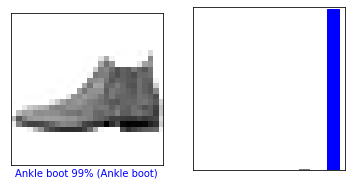

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

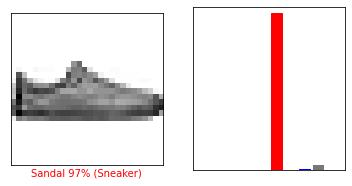

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Vamos plotar algumas da previsão do modelo. Labels preditas corretamente são azuis e as predições erradas são vermelhas. O número dá a porcentagem (de 100) das labels preditas. Note que o modelo pode errar mesmo estão confiante.

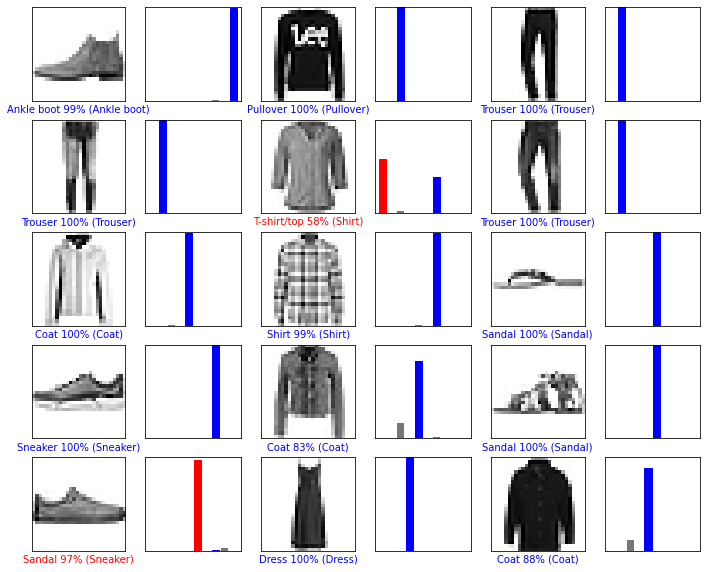

In [25]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finamente, use  o modelo treinado para fazer a predição de uma única imagem.

In [26]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


Modelos `tf.keras` são otimizados para fazer predições em um *batch*, ou coleções, de exemplos de uma vez. De acordo, mesmo que usemos uma única imagem, precisamos adicionar em uma lista:

In [27]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Agora prediremos a label correta para essa imagem:

In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.16514775e-06 1.97676684e-11 1.94904359e-07 1.14127145e-10
  1.59838021e-09 6.14729361e-04 7.28969098e-07 9.40205436e-03
  6.20376355e-08 9.89979029e-01]]


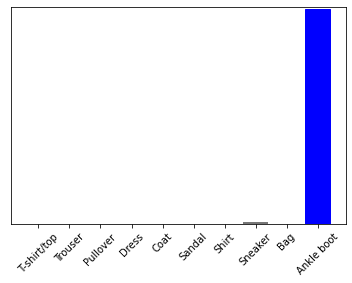

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna a lista de listas — uma lista para cada imagem em um *batch* de dados. Pegue a predição de nossa (única) imagem no *batch*:

In [30]:
np.argmax(predictions_single[0])

9

E, como antes, o modelo previu a label como 9.